In [59]:
# -*- coding: utf-8 -*- 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm


from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/Users/fountain/Desktop/pandas/Songti.ttc", size=10) 

# 读取数据集
wine = pd.read_csv('/Users/fountain/Downloads/statistics/winequality-both.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ','_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
# 显示所有变量的描述性统计量，包括总数、均值、标准差、最小值、第25个百分位数、中位数
# 第75个百分位数和最大值
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [61]:
# 找出quality的唯一值
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [62]:
# 计算出每个唯一值在数据集中出现的次数
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [63]:
# 对葡萄酒进行类别分组，以及直方图的绘制，t检验

# 按照葡萄酒的类型显示质量的描述性统计量
wine.groupby('type')[['quality']].describe().unstack('type')

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64

In [64]:
# 按照葡萄酒的类型计算质量的分位数
# 使用quantile函数对质量列计算第25百分位数和第75位百分位数
wine.groupby('type')[['quality']].quantile([0.25,0.75])

quality
type               
red   0.25      5.0
      0.75      6.0
white 0.25      5.0
      0.75      6.0

In [65]:
# 按照葡萄酒类型查看质量分布
red_wine = wine.loc[wine['type']=='red', 'quality']
print red_wine
white_wine = wine.loc[wine['type']=='white', 'quality']
print white_wine

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
1599    6
1600    6
1601    6
1602    6
1603    6
1604    6
1605    6
1606    6
1607    6
1608    6
1609    5
1610    5
1611    5
1612    7
1613    5
1614    7
1615    6
1616    8
1617    6
1618    5
1619    8
1620    7
1621    8
1622    5
1623    6
1624    6
1625    6
1626    6
1627    6
1628    7
       ..
6467    6
6468    6
6469    7
6470    

In [66]:
pd.DataFrame(white_wine).quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [67]:
pd.DataFrame(red_wine).quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


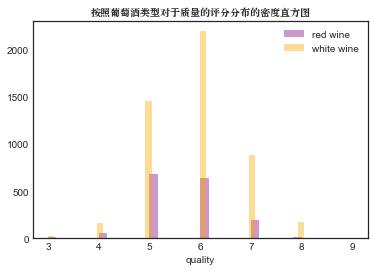

In [68]:
# 直方图绘制，表示两种葡萄酒类型评分分布的密度直方图
sns.set_style('white')
print(sns.distplot(red_wine, norm_hist=False, kde=False, color='purple', label='red wine'))
print(sns.distplot(white_wine, norm_hist=False, kde=False, color='orange', label='white wine'))
sns.axlabel=("Quality Score", "Density")

plt.title(u"按照葡萄酒类型对于质量的评分分布的密度直方图", fontproperties = font_set)
plt.legend()
plt.show()
# 从统计图中可以看出，两种葡萄酒的评分都近似正态分布

In [69]:
# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同
print(wine.groupby(['type'])[['quality']].agg(['std']))

        quality
            std
type           
red    0.807569
white  0.885639


In [70]:
tstat,pvalue,df= sm.stats.ttest_ind(red_wine,white_wine)
print('tstats: %.3f  pvalue: %.4f' % (tstat, pvalue))
# 进行t检验ttest_ind()，看看红葡萄酒和白葡萄酒评分的标准差是否相同，所以在t检验中可以使用
# 合并方差。t检验统计量为-9.686，p值为0.00，这说明白葡萄酒的平均质量评分在统计意义上大于
# 红葡萄酒平均质量评分。

tstats: -9.686  pvalue: 0.0000


In [71]:
# 使用最小二乘估计进行线性回归

# quality是因变量， ~波浪线后面的则是自变量。
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'

# ols(ordinary least square普通最小二乘法), 使用公式和数据拟合出一个普通最小二乘回归模型，并将结果赋给变量lm。

lm = ols(my_formula, data = wine).fit()
## 或者，也可以使用广义线性模型（glm）语法进行线性回归
## lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit()


# 打印出结果的摘要信息，它包含了模型系数、系数的标准差和置信区间、修正R方、F统计量等模型详细信息
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:50:43   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
print('\nQuantities you can extract from the result:\n%s' % dir(lm))
print('\n返回模型系数:\n%s' % lm.params)
print('\n系数标准差：\n%s' % lm.bse)
print('\n修正R方: \n%.2f' % lm.rsquared_adj)
print('\n返回F统计量: %.1f，p值:%.2f' % (lm.fvalue, lm.f_pvalue))
print('\n返回观测数：%d， 拟合值的数量：%d' % (lm.nobs, len(lm.fittedvalues)))


Quantities you can extract from the result:
['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues

In [73]:
# 自变量标准化

# 普通最小二乘回归是通过使残差平方和最小化来估计未知的β参数值的。这里的残差是指自变量观测值与拟合值之间的差别。
# 因为残差大小是依赖于自变量的测量单位的。如果自变量的测量单位相差太大的话，那么将自变量标准化后，就可以更容易
# 对模型进行解释了。

# 对自变量进行标准化的方法是，先从自变量的每个观测值中减去均值，然后再除以这个自变量的标准差。自变量标准化完成后，
# 它的均值为0，标准差为1.

In [74]:
wine.describe()
# 使用wine.describe()，可以看出各个自变量值的变化范围相差非常悬殊，比如total_sulfur_dioxide的范围是从6.0到440.0

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [75]:
# 创建一个名为dependent_variable的序列来保存质量数据
dependent_variable = wine['quality']

# 创建一个名为independent_variables的数据框来保存初始的葡萄酒数据集中除quality、type和in_sample的所有变量
independent_variables = wine[wine.columns.difference(['quality','type','in_sample'])]

# 对自变量进行标准化
# 对每个变量，在每个观测值中减去变量的均值，然后使用结果除以变量的标准差
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()

# 将因变量quality作为一列添加到自变量数据框中
# 创建一个带有标准化自变量的新数据集
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)

# 至此自变量标准化完成，现在重新进行线性回归
lm_standardized = ols(my_formula, data=wine_standardized).fit()
lm_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:50:43   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184      0.009    637.785      0.000       5.800       5.836
alcohol                  0.3185      0.020     15.963      0.000       0.279       0.358
chlorides               -0.0169      0.012     -1.454      0.146      -0.040       0.006
citric_acid             -0.0159      0.012     -1.377      0.168      -0.039       0.007
density                 -0.1648      0.036     -4.529      0.000      -0.236      -0.093
fixed_acidity            0.0877      0.020      4.346      0.000       0.048       0.127
free_sulfur_dioxide      0.1060      0.013      7.948      0.000       0.080       0.132
pH                       0.0706      0.015      4.861      0.000       0.042       0.099
residual_sugar           0.2072      0.025      8.449      0.000       0.159       0.255
sulphates                0.1143      0.011     10.092      0.000       0.092       0.137
total_sulfur_dioxide    -0.1402      0.016     -8.969      0.000      -0.171      -0.110
volatile_acidity        -0.2186      0.013    -17.162      0.000      -0.244      -0.194
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                         9.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [77]:
# 预测

# 使用葡萄酒数据集中的前10个观测创建10个“新”观测
# 新观测中只包含模型中使用的自变量
new_observations = wine.loc[wine.index.isin(range(10)), independent_variables.columns]

# 基于新观测中的葡萄酒特性预测质量评分
y_predicted = lm.predict(new_observations)
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69]
